<a href="https://colab.research.google.com/github/digdemorhan/Keras_With_Examples_For_Deep_Learning/blob/main/ImageClassificationWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KERAS SEQUENTIAL YÖNTEMİ İLE SINIFLANDIRMA PROBLEMİ ÇÖZÜMÜ**



In [ ]:
#Tensorflow'un import edilmesi
import tensorflow as tf

#Verisetinin bir değişkene atanması
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#Verisetinin eğitim ve test şeklinde parçalanması
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

#Validasyon veri setinin oluşturulması
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] #Validasyon verilerini oluşturmak için eğitim veri setinden 5000 tane alındı
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Eğitim verisetinin yapısını kontrol edelim
X_train.shape

(55000, 28, 28)

***Eğitim verisetinde 55000 tane 28x28 boyutunda örneklem bulunmaktadır.***

In [ ]:
#Verisetinde yer alan resimlerin veri tipine bakalım
X_train.dtype


dtype('uint8')

***Verilerin tipi tamsayı şeklindedir.***

In [ ]:
#Girdi verilerinin ölçeklendirilmesi
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

***Çıktı verileri kategorilerden oluştuğu için ölçeklemeye gerek yoktur.***

In [ ]:
#Kategorileri etiketlemek için değişken oluşturulması
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#İlk örneklemin etiketine bakılması
class_names[y_train[0]]

'Ankle boot'

In [ ]:
#Modelin kurulması

#rastgeleliğin sabitlenmesi
tf.random.set_seed(42)

#modelin oluşturulması
model = tf.keras.Sequential()

#input layerın oluşturulması
model.add(tf.keras.layers.Input(shape=[28,28]))

#flatten layerın oluşturulması
model.add(tf.keras.layers.Flatten())

#ilk hidden layerın oluşturulması, nöron sayısının belirlenmesi ve aktivasyon fonksiyonunun yazılması (girdilerin bağlantılı olması için dense layer kullanıldı)
model.add(tf.keras.layers.Dense(300, activation="relu"))

#ikinci hidden layerın oluşturulması
model.add(tf.keras.layers.Dense(100, activation="relu"))

#output layerın oluşturulması
model.add(tf.keras.layers.Dense(10, activation="softmax"))

"""
Model, Sequential sınıfından bir örnek olarak da oluşturulabilir. Burada liste şeklinde oluşturulmuştu ve derin öğrenmede genelde bu yöntem kullanılır.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
"""



'\nModel, Sequential sınıfından bir örnek olarak da oluşturulabilir. Burada liste şeklinde oluşturulmuştu ve derin öğrenmede genelde bu yöntem kullanılır.\n\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Flatten(input_shape=[28,28]),\n    tf.keras.layers.Dense(300, activation="relu"),\n    tf.keras.layers.Dense(100, activation="relu"),\n    tf.keras.layers.Dense(10, activation="softmax")\n])\n'

***Girdi verilerinin bir boyutlu dizi yapısına çevrilmesi için Flatten Layer kullanılmıştır. Verilerin bir batch'i alınacka ve ardından bir boyutlu yapıya çevrilecektir.
[32,28,28] -> [batch sayısı, resimlerin boyutları, resimlerin boyutları]
[32,28,28] => Flatten layer ile [32,28*28]=[32,784] ***

***Girdi verilerinin boyutu bilinmiyorsa ve girilmediyse, Keras otomatik olarak bunu atayacaktır.***

***Aktivasyon fonksiyonu "Relu", 0'dan küçük değerleri 0'a ve 0'dan büyük değerleri kendisine götürür.***

***Çıktı katmanındaki nöron sayısı, çıktı verilerindeki sınıf sayısı kadar olmalıdır (kodda 10 tane olduğu için 10 alınacak). Sınıflandırma analizi yapıldığı için, çıktı katmanındaki aktivasyon fonksiyonu "softmax" alınmıştır.***

In [ ]:
#Modelin özetinin görülmesi
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Modelin katmanlarının görülmesi
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

***Bir layerdaki tüm parametrelere get_weights() ve set_weights() parametreleri ile ulaşılabilir.***

In [ ]:
#İlk gizli katmanının ağırlıklarına bakılması
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights)
print(biases)

[[-0.03615748  0.02345686  0.04439476 ... -0.03359218 -0.0188592
  -0.0697004 ]
 [-0.00521383  0.02401844 -0.02675854 ... -0.03969854  0.04602452
  -0.0018309 ]
 [ 0.04461801  0.06969765  0.06704463 ... -0.00934226  0.07103992
  -0.05097785]
 ...
 [ 0.05995423  0.00034969 -0.01915436 ...  0.05054902  0.04537611
   0.03106863]
 [ 0.05150621 -0.03948162  0.07316673 ...  0.05591923  0.069795
   0.00944567]
 [-0.04563121  0.06614754  0.01322045 ...  0.04629088  0.05169079
   0.02321567]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


***Biaslar başlangıçta 0 olarak başlatılır.***

In [ ]:
#Modelin compile edilmesi
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd", #stochastic gradient descent, keras bu şekilde backpropagation kullanır
    metrics = ["accuracy"] #değerlendirme metriği
)

#Modelin eğitimi
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)
"""
Validasyon veri seti önceden belirlenmemişse validation_split parametresi
ile eğitim verisinin parçalama işlemi yapılabilir.
"""

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6968 - loss: 0.9621 - val_accuracy: 0.8312 - val_loss: 0.5011
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8285 - loss: 0.5028 - val_accuracy: 0.8440 - val_loss: 0.4465
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8454 - loss: 0.4484 - val_accuracy: 0.8490 - val_loss: 0.4248
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8559 - loss: 0.4180 - val_accuracy: 0.8524 - val_loss: 0.4108
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8640 - loss: 0.3963 - val_accuracy: 0.8544 - val_loss: 0.4002
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8684 - loss: 0.3790 - val_accuracy: 0.8572 - val_loss: 0.3924
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8722 - loss: 0.3644 - val_accuracy: 0.8606 - val_loss: 0.3853
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8756 - loss: 0.3519 - 

'\nValidasyon veri seti önceden belirlenmemişse validation_split parametresi\nile eğitim verisinin parçalama işlemi yapılabilir.\n'

***Çıktı değişkeni one-hot kodlama yapılmamışsa "sparse_categorical_crossentropy" kullanılır. One-hot kodlama yapılmışsa "categorical_crossentropy" kullanılır. Keras'la one-hot kodlama yapmak için "tf.keras.utils.to_categorial" metodu kullanılabilir.***
***İkili sınıflandırma veya çok etiketli ikili sınıflandırma olması durumunda  çıktı katmanında aktivasyon fonksiyonu olarak softmax yerine "sigmoid" ve loss fonksiyonu olarak "binary_crossentropy" kullanılır.***

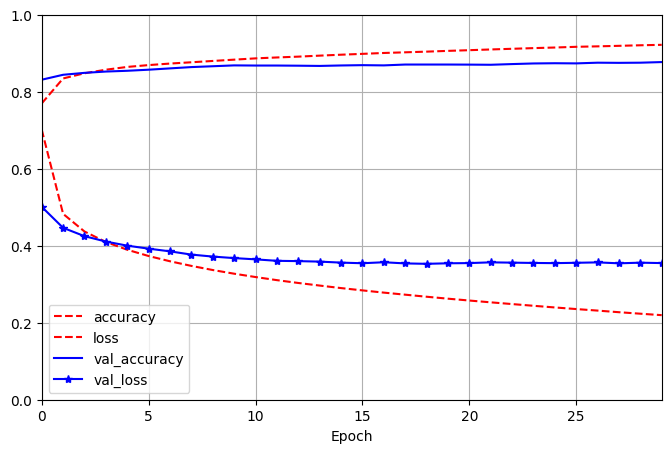

In [ ]:
#Metriklerin grafiğini çizdirme
import matplotlib.pyplot as plt

#değerleri dataframe'e çevirmek için
import pandas as pd

#Değerlerin dataframe'e çevrilmesi
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid=True,
                                   xlabel="Epoch",
                                   style=["r--","r--","b-","b-*"])
plt.show()



***"figsize" ile grafiğin boyutu girilmiştir.
"xlim" ile x ekseninin boyutu, "ylim" ile y ekseninin boyutu girilmiştir.
"grid=True" ile grafiğin ızgara şeklinde olması sağlanmıştır.
"xlabel" ile x ekseninin ismi belirlenmiştir.
"style" ile grafiğin özellikleri ayarlanmıştır.***

In [ ]:
#Modelin performasının görülmesi
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8725 - loss: 0.3691


[0.3678458034992218, 0.8734999895095825]

In [ ]:
#Yeni verilerin tahmin edilmesi
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#En yüksek olasılıklara sahip değerlerin çekilmesi
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
